In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target

# 前処理: カテゴリ変数化
df.RAD = df.RAD.astype(np.int8)
df.RAD = df.RAD.map(lambda x: chr(x - 1 + ord('A')) )

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,A,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,B,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,B,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,C,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,C,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,A,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,A,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,A,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,A,273.0,21.0,393.45,6.48,22.0


## 度数分布表

In [37]:
print(df.AGE.min(), df.AGE.max())

binned = pd.cut(df.AGE, [10*x for x in range(11)])
distribution = pd.DataFrame(binned.value_counts().sort_index())
# 階級値
distribution['level'] = distribution.index.map(lambda x: (x.left + x.right)/2)
# 相対度数
distribution['rel_counts'] = distribution['AGE'] / distribution['AGE'].sum()
# 累積相対度数
distribution['acm_rel_counts'] = distribution['rel_counts'].cumsum()
distribution

2.9 100.0


,AGE,level,rel_counts,acm_rel_counts
"(0, 10]",14,5.0,0.027668,0.027668
"(10, 20]",20,15.0,0.039526,0.067194
"(20, 30]",30,25.0,0.059289,0.126482
"(30, 40]",45,35.0,0.088933,0.215415
"(40, 50]",38,45.0,0.075099,0.290514
"(50, 60]",38,55.0,0.075099,0.365613
"(60, 70]",34,65.0,0.067194,0.432806
"(70, 80]",47,75.0,0.092885,0.525692
"(80, 90]",72,85.0,0.142292,0.667984
"(90, 100]",168,95.0,0.332016,1.000000


## Histogram

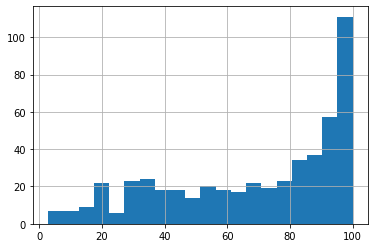

In [6]:
df.AGE.hist(bins=20)

## Bar Chart

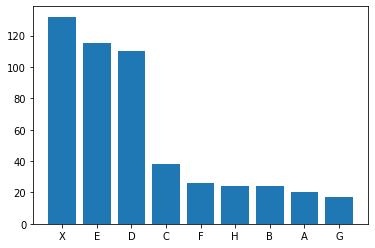

In [7]:
vc = df.RAD.value_counts()
plt.bar(vc.index, height=vc.values)
plt.show()

## Band Chart

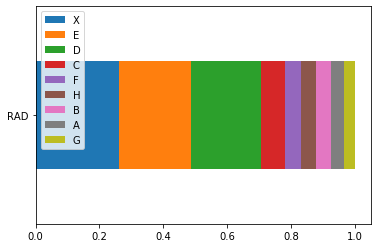

In [8]:
vc = df.RAD.value_counts()
vc = pd.DataFrame((vc / vc.sum())).transpose()
vc.plot.barh(stacked=True)
plt.show()

## Pie Chart

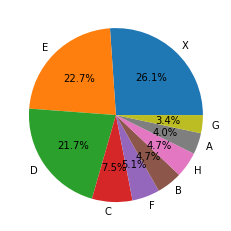

In [14]:
vc = df.RAD.value_counts().sort_values(ascending=False)
plt.pie(vc.values, labels=vc.index, autopct='%1.1f%%')
plt.show()

## Mosaic Chart (Deprecated)

In [10]:
df2 = pd.DataFrame([[1,50,20,20,10,100],
[2,30,25,15,50,120],
[3,25,25,40,40,130],
[4,40,10,40,20,110]], columns=['grade','zoo','plant','lunch','park','total'])
df2 = df2.set_index('grade').drop('total',axis=1)
df2

,zoo,plant,lunch,park
grade,,,,
1,50,20,20,10
2,30,25,15,50
3,25,25,40,40
4,40,10,40,20


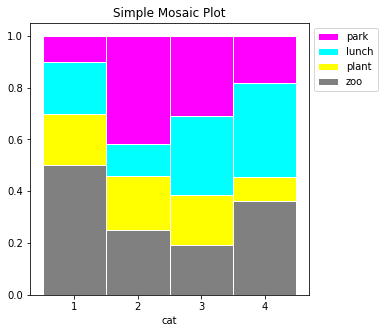

In [11]:
def mosaicplot(df, color_list,  x_label_suffix = None, figsize=(5,5), barwidth = 1,
              title = "Simple Mosaic Plot", xlabel = 'cat'):
    """ 
        Create mosaic plot based on stacked bar charts.
        x axis will be taken from the dateframe index.
        the category will be based on all the columns.        
        
        Args:
            df (dataframe): Dataframe object with index (x) and the columns as the categories.
            color_list (list): Color list for the different categories.
            x_label_suffix (str): additional string to added to x axis beside the df index.
            figsize (tuple): size of plots
            barwidth(int): width of bar (relative to 1)
    """
    
    plt.figure(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
    
    if x_label_suffix is None:
        x_label_suffix = ''
        
    x = [x_label_suffix + str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

    # Configure title and axis
    plt.title(title)
    plt.xlabel(xlabel)
    
cmap = ['magenta', 'cyan', 'yellow', 'gray']
mosaicplot(df2, color_list=cmap)

## Stacked Bar Chart

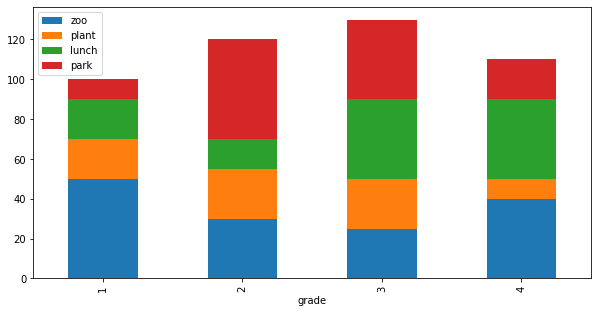

In [12]:
df2.plot.bar(stacked=True, figsize=(10,5))